In [10]:
import pandas as pd
import numpy 
df = pd.read_csv("dataset.csv")
df = df.iloc[:4,:5]

In [11]:
print(df.head())

    Q1   Q2   Q3   Q4   Q5
0  325   72  184  405  431
1  229  235  141  482  170
2   37  172   78  319  220
3  224  465  421  101  236


In [12]:

data = numpy.array(df)

R = data

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.00001, beta=0.001):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter
    '''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:

            break

    return P, Q.T
 



In [13]:
def rmse(R,K):
    R = numpy.array(R)
    N = len(R)
    M = len(R[0])
    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)
    nP, nQ = matrix_factorization(R, P, Q, K)
    nR = numpy.dot(nP, nQ.T)
    return numpy.sqrt(((nR - R) ** 2).mean())
data = {}
for k in range(1,20):
    data[k] = rmse(R,k)
    print(data)

{1: 117.89649551871413}
{1: 117.89649551871413, 2: 61.21220183960168}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488, 5: 0.0009993554240297637}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488, 5: 0.0009993554240297637, 6: 0.0009996744597265156}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488, 5: 0.0009993554240297637, 6: 0.0009996744597265156, 7: 0.001001785991391414}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488, 5: 0.0009993554240297637, 6: 0.0009996744597265156, 7: 0.001001785991391414, 8: 0.0009992304839583988}
{1: 117.89649551871413, 2: 61.21220183960168, 3: 29.484294819354208, 4: 0.0010835808556786488, 5: 0.0009993554240297637, 6: 0.00

  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 3.6 MB/s eta 0:00:00
  Using cached fonttools-4.47.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)


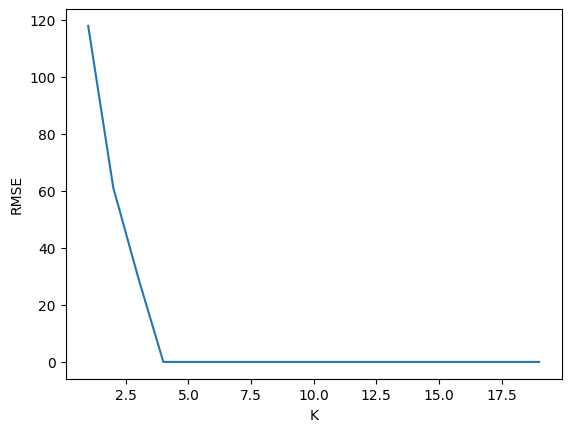

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(list(data.keys()), list(data.values()))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()
